# PCA Task
### Let us start the PCA task on the BATAdal dataset.
#### Step 0: Reading the both the data sets (BATADAL_dataset03, 04) using read_csv and explore the column names and data
#### Step 1: Normalize the training dataset
#### Step 2: Apply PCA analysis on training data
#### Step 3: Tune the threshold  
#### Step 4: Apply the same normalization and PCA transform on the test data



#### Step 0: Reading the both the data sets (BATADAL_dataset03, 04) using read_csv and explore the column names and data

In [89]:
#Step 0: Reading the both the data sets (BATADAL_dataset03, 04) using read_csv and explore the column names and data
#importing pandas for reading the csv file
import pandas as pd
import matplotlib.pyplot as plt

dataset03 = pd.read_csv("dataset/BATADAL_dataset03.csv")
dataset04 = pd.read_csv("dataset/BATADAL_dataset04.csv")

# Observing the dataset columns and values
print ("BATADAL_dataset03.csv")
print(dataset03.head())
print (dataset03.columns)
print ("BATADAL_dataset04.csv")
print(dataset04.head())
print (dataset04.columns)

BATADAL_dataset03.csv
      DATETIME      L_T1      L_T2      L_T3      L_T4      L_T5      L_T6  \
0  06/01/14 00  0.509730  2.049003  3.191145  2.792634  2.656091  5.316831   
1  06/01/14 01  0.412580  2.009072  3.642565  2.831673  3.126387  5.494855   
2  06/01/14 02  0.320112  1.986093  4.140192  3.256733  3.574601  5.500000   
3  06/01/14 03  0.332879  2.009203  4.673478  3.744497  3.952379  5.500000   
4  06/01/14 04  0.483496  2.089049  5.237937  4.409456  3.504676  5.500000   

       L_T7      F_PU1  S_PU1    ...        P_J256     P_J289     P_J415  \
0  1.562321  98.998444      1    ...     87.605774  26.495605  84.206619   
1  1.852043  99.095901      1    ...     89.448341  26.487326  85.900085   
2  2.246126  98.420959      1    ...     91.056114  26.487364  86.582474   
3  3.203573  97.575172      1    ...     92.594353  26.575815  88.020546   
4  4.439714  97.351059      1    ...     94.473099  26.723457  90.422462   

      P_J302     P_J306     P_J307     P_J317      P

## Pre-Processing - Dataset03
#### Dropping ATT_FLAG and DATETIME columns in dataset03 as they are not important for the PCA

In [90]:
dataset03= dataset03.drop("ATT_FLAG",axis=1,inplace=False) 
dataset03.head()
dataset03 = dataset03.loc[:,dataset03.columns!='DATETIME'] 
dataset03.head()

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J300,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422
0,0.509730,2.049003,3.191145,2.792634,2.656091,5.316831,1.562321,98.998444,1,99.018150,...,26.426495,87.605774,26.495605,84.206619,18.901676,81.983734,18.791777,67.125603,29.387470,28.487471
1,0.412580,2.009072,3.642565,2.831673,3.126387,5.494855,1.852043,99.095901,1,99.115639,...,26.422962,89.448341,26.487326,85.900085,18.849329,82.150589,18.739643,67.178696,29.354256,28.454256
2,0.320112,1.986093,4.140192,3.256733,3.574601,5.500000,2.246126,98.420959,1,98.440498,...,26.427771,91.056114,26.487364,86.582474,19.597170,83.988579,19.496712,72.425293,29.354538,28.454538
3,0.332879,2.009203,4.673478,3.744497,3.952379,5.500000,3.203573,97.575172,1,97.594460,...,26.519985,92.594353,26.575815,88.020546,26.028486,64.670486,25.922703,76.275040,29.449951,28.549952
4,0.483496,2.089049,5.237937,4.409456,3.504676,5.500000,4.439714,97.351059,1,97.370277,...,26.671642,94.473099,26.723457,90.422462,26.209970,64.746620,26.104692,76.703529,29.574265,28.674263


#### Training data is taken from BATADAL_dataset03 at first and PCA will be applied on this.

#### Step 1: Normalize the training dataset

##### Let us first create the normalized training data by applying StandardScaler

In [91]:
#http://scikit-learn.org/stable/modules/preprocessing.html
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
scaler.fit(dataset03)
X_scaled = scaler.transform(dataset03)

print("X_scaled")
print(X_scaled)
#Scaled data has zero mean and unit variance:
print("Mean")
print(X_scaled.mean(axis=0))
print("Standard Deviation")
print(X_scaled.std(axis=0))


X_scaled
[[-1.80166786 -0.84216105 -1.4897346  ... -0.14960353 -1.03212449
  -0.36335486]
 [-1.88243244 -0.8693521  -0.82434137 ... -0.13962538 -1.03997205
  -0.37585097]
 [-1.95930569 -0.88499958 -0.09084088 ...  0.84640594 -1.03990535
  -0.37574476]
 ...
 [ 0.36394528  0.45105891 -1.58995051 ... -0.2674142  -0.58470987
   0.34908874]
 [ 0.21173951  0.41325741 -0.97116869 ... -0.20251108 -0.60133195
   0.32262046]
 [ 0.05827056  0.36958123 -0.32060645 ...  0.12189842 -0.60166048
   0.32209734]]
Mean
[-2.41686720e-16 -1.00162114e-16 -2.07268666e-16 -1.89780847e-16
 -1.33110177e-16  3.10462001e-15 -2.83860241e-17  3.77128606e-16
  0.00000000e+00 -2.75141677e-16  4.11597350e-17  0.00000000e+00
  0.00000000e+00 -7.02554098e-17 -1.63726532e-17  0.00000000e+00
  0.00000000e+00 -3.04135973e-17 -3.40632290e-17  1.13138582e-16
 -8.47525578e-17 -7.13198857e-17 -6.58454381e-17  0.00000000e+00
  0.00000000e+00 -3.11435236e-16 -3.71045887e-17 -4.46066094e-18
  1.41930121e-17  8.39415285e-17 -5.636

#### Step 2: Apply PCA analysis on training data - dataset03



In [92]:
#n_components= None
import numpy as np
from sklearn.decomposition import PCA
pca = PCA()
fit = pca.fit(X_scaled)
transform = pca.transform(X_scaled)


print(pca.fit(X_scaled))
print(pca.transform(X_scaled))
print("--------------explained_variance_ratio_--------------")
print(pca.explained_variance_ratio_) 
print("-----------------singular_values_--------------------")
print(pca.singular_values_)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
[[-2.24905257e+00 -2.51721473e+00 -1.61306891e+00 ...  3.26578857e-16
   2.31904911e-17  1.89331602e-16]
 [-2.31116088e+00 -2.56834897e+00 -1.59614586e+00 ...  3.34507410e-16
   1.87523230e-16  2.21675316e-16]
 [-2.15564395e+00 -2.55573008e+00 -1.52915128e+00 ...  5.18984131e-16
   2.19801896e-16  3.25349036e-16]
 ...
 [-1.08896885e+00 -2.33739456e+00 -1.24527305e+00 ...  9.00733384e-16
  -8.81178099e-17  4.87490364e-16]
 [-1.14882797e+00 -2.36946046e+00 -1.26217592e+00 ...  9.21456935e-16
  -8.91179772e-18  5.01815856e-16]
 [-1.22150861e+00 -2.51090192e+00 -1.16303742e+00 ...  8.83889623e-16
   7.77725566e-17  5.59299116e-16]]
--------------explained_variance_ratio_--------------
[2.14942175e-01 1.33800981e-01 1.28034135e-01 9.97660991e-02
 7.21351518e-02 6.76029376e-02 5.55306781e-02 5.53794557e-02
 4.25269870e-02 3.24840113e-02 2.56616888e-02 2.45804466e-02
 1.8638

Text(0.5,1,'PC-43')

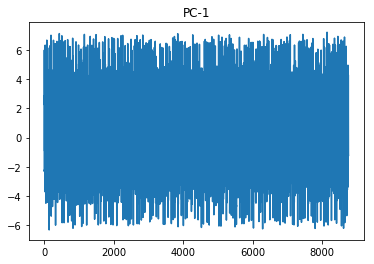

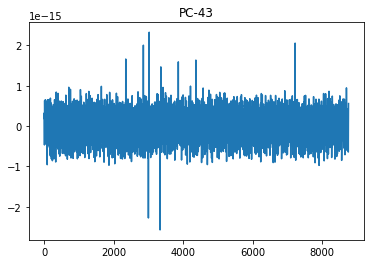

In [93]:
transform_dataframe = pd.DataFrame(transform)
transform_dataframe.head()

plt.figure()
transform_dataframe[0].plot()
plt.title("PC-1")
plt.figure()
transform_dataframe[42].plot()
plt.title("PC-43")

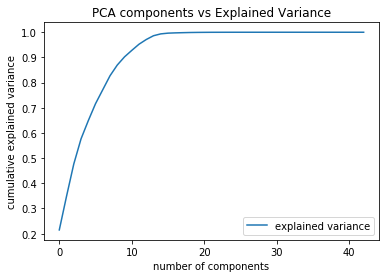

In [94]:
plt.plot(np.cumsum(pca.explained_variance_ratio_),label ='explained variance')
plt.title('PCA components vs Explained Variance')
plt.legend()
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

let us try the PCA for n_components for 10,11,12,13,14,15 as we see visually, the n_components post 15 produces stable variance

X_scaled
[[-1.80166786 -0.84216105 -1.4897346  ... -0.14960353 -1.03212449
  -0.36335486]
 [-1.88243244 -0.8693521  -0.82434137 ... -0.13962538 -1.03997205
  -0.37585097]
 [-1.95930569 -0.88499958 -0.09084088 ...  0.84640594 -1.03990535
  -0.37574476]
 ...
 [ 0.36394528  0.45105891 -1.58995051 ... -0.2674142  -0.58470987
   0.34908874]
 [ 0.21173951  0.41325741 -0.97116869 ... -0.20251108 -0.60133195
   0.32262046]
 [ 0.05827056  0.36958123 -0.32060645 ...  0.12189842 -0.60166048
   0.32209734]]
Mean
[-2.41686720e-16 -1.00162114e-16 -2.07268666e-16 -1.89780847e-16
 -1.33110177e-16  3.10462001e-15 -2.83860241e-17  3.77128606e-16
  0.00000000e+00 -2.75141677e-16  4.11597350e-17  0.00000000e+00
  0.00000000e+00 -7.02554098e-17 -1.63726532e-17  0.00000000e+00
  0.00000000e+00 -3.04135973e-17 -3.40632290e-17  1.13138582e-16
 -8.47525578e-17 -7.13198857e-17 -6.58454381e-17  0.00000000e+00
  0.00000000e+00 -3.11435236e-16 -3.71045887e-17 -4.46066094e-18
  1.41930121e-17  8.39415285e-17 -5.636

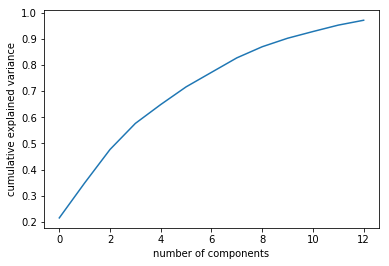

In [95]:
#http://scikit-learn.org/stable/modules/preprocessing.html
from sklearn import preprocessing
import numpy as np
scaler = StandardScaler()
scaler.fit(dataset03)
X_scaled = scaler.transform(dataset03)

print("X_scaled")
print(X_scaled)
#Scaled data has zero mean and unit variance:
print("Mean")
print(X_scaled.mean(axis=0))
print("Standard Deviation")

print(X_scaled.std(axis=0))
import numpy as np
from sklearn.decomposition import PCA
pca13 = PCA(n_components=13)
fit = pca13.fit(X_scaled)
transform = pca13.transform(X_scaled)


print(pca13.fit(X_scaled))
print(pca13.transform(X_scaled))
print("--------------explained_variance_ratio_--------------")
print(pca13.explained_variance_ratio_) 
print("-----------------singular_values_--------------------")
print(pca13.singular_values_)

#pca = PCA().fit(dta.iloc[:,2:42]) #modify this 
plt.plot(np.cumsum(pca13.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Hence n_components = 13 is a good value after which there is no variance

In [96]:
import pandas as pd
dataset04_compare = dataset04
dataset04 = dataset04.drop(" ATT_FLAG",axis=1,inplace=False) 
dataset04.head()
dataset04 = dataset04.loc[:,dataset04.columns!='DATETIME'] 
dataset04.head()


,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J300,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422
0,2.44,5.24,3.19,4.10,2.86,5.50,4.39,93.63,1.0,93.65,...,28.26,70.00,28.22,85.87,21.69,82.72,21.58,71.99,39.33,29.64
1,2.66,4.53,3.20,4.18,3.29,5.44,4.53,89.41,1.0,89.43,...,24.39,87.73,24.45,84.87,29.81,86.62,29.81,59.76,42.17,26.15
2,3.11,3.66,3.66,4.21,3.87,5.15,3.22,89.88,1.0,89.89,...,23.84,89.29,23.90,87.11,29.85,87.64,29.85,58.50,42.00,25.56
3,3.62,3.04,4.17,4.04,3.56,4.98,2.40,88.10,1.0,88.12,...,27.00,91.98,27.10,68.75,31.60,64.25,31.47,72.30,43.24,28.38
4,4.08,2.68,4.73,3.20,3.11,5.39,3.46,87.01,1.0,87.03,...,26.67,92.11,26.76,68.74,32.30,64.23,32.17,72.53,44.00,28.04


In [97]:
#Normalzation
X_scaled04 = scaler.transform(dataset04)


Text(0.5,1,'PC-13')

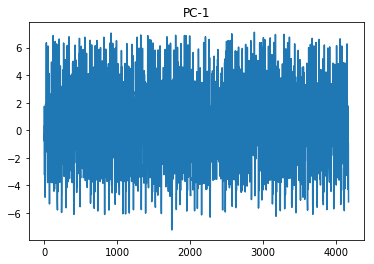

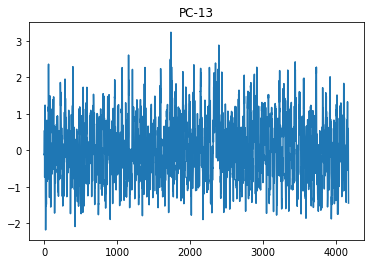

In [98]:
transform04_dataframe = pd.DataFrame(transform04)
transform04_dataframe.head()

plt.figure()
transform04_dataframe[0].plot()
plt.title("PC-1")
plt.figure()
transform04_dataframe[12].plot()
plt.title("PC-13")

In [99]:
#PCA
import numpy as np
from sklearn.decomposition import PCA
transform04 = pca13.transform(X_scaled04)

print(pca.transform(X_scaled04))
print("--------------explained_variance_ratio_--------------")
print(pca.explained_variance_ratio_) 
print("-----------------singular_values_--------------------")
print(pca.singular_values_)


[[-3.12483573e-01 -2.15741026e+00  1.62838447e-01 ... -2.68180660e-15
   3.01116391e-15  7.10229701e-16]
 [-5.69167060e-01 -1.71862255e+00  3.98612509e+00 ... -6.88492283e-16
   2.08104068e-15  1.05697156e-15]
 [-7.73738537e-01 -1.44370738e+00  4.35965669e+00 ... -1.21520302e-15
   2.21662183e-15  1.13096101e-15]
 ...
 [-2.53533967e+00  3.17386941e+00 -2.16057214e-01 ... -1.86260209e-15
   8.66024192e-16  1.70634257e-16]
 [-3.50711558e+00  1.98152908e+00 -1.06158996e+00 ... -4.38028524e-15
  -6.09627418e-15  1.79865060e-15]
 [-5.19210419e+00  6.65528828e-01 -3.29727027e+00 ... -3.85488503e-15
  -6.01443265e-15  1.78513791e-15]]
--------------explained_variance_ratio_--------------
[2.14942175e-01 1.33800981e-01 1.28034135e-01 9.97660991e-02
 7.21351518e-02 6.76029376e-02 5.55306781e-02 5.53794557e-02
 4.25269870e-02 3.24840113e-02 2.56616888e-02 2.45804466e-02
 1.86386274e-02 1.50846051e-02 7.31480905e-03 2.90997980e-03
 1.09327713e-03 7.87721623e-04 6.63723176e-04 4.06582176e-04
 2.53

In [100]:
transform_df03 = pd.DataFrame(transform)
transform_df03.columns = ["PC"+str(x) for x in transform_df03.columns]
transform_df03

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-2.249053,-2.517215,-1.613069,1.107770,0.749800,-1.103910,0.018657,-0.013266,-2.241742,0.215151,1.238688,0.653732,-1.248010
1,-2.311161,-2.568349,-1.596146,1.588804,0.592560,-1.261084,-0.101616,-0.006762,-1.371693,0.070731,0.785434,1.137084,-1.154187
2,-2.155644,-2.555730,-1.529151,2.097994,0.193176,-1.281794,-0.138535,-0.035479,-0.652163,0.433895,-0.254044,1.082844,-0.999479
3,-0.267189,-1.092692,0.594193,4.426828,-0.696264,-0.051393,-0.180525,-0.125116,-0.194896,-0.024431,-1.134491,0.870347,-0.990834
4,0.128766,-0.867910,0.605038,4.657784,-0.789203,-0.036409,-0.256304,-0.293012,1.234895,0.089157,-1.705055,-0.312718,-1.168507
5,5.984754,1.496611,0.341764,0.301568,-0.504483,-2.531481,-0.226974,0.612778,0.436375,-0.039529,-0.327877,0.980286,-1.339727
6,3.780521,0.839686,1.083312,1.094297,3.269845,-0.174475,0.367863,-0.225984,-1.062821,0.038039,0.507156,1.199847,-0.850363
7,2.266063,-0.152867,-0.144568,1.316162,0.398913,2.217682,0.263004,-0.432826,-1.077634,0.553429,0.059983,0.149332,-0.897134
8,2.235607,-0.249075,-0.267253,1.352111,0.166759,2.582775,0.173692,-0.546635,-0.122291,-0.129824,0.190520,-0.798383,-1.130697
9,2.891118,-1.008075,-3.234725,-2.456747,-2.992559,-1.018200,-0.334111,0.384577,0.684796,0.169329,0.394068,-0.761110,-1.246885


In [101]:
transform_df04 = pd.DataFrame(transform04)
transform_df04.columns = ["PC"+str(x) for x in transform_df04.columns]
transform_df04.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-0.312484,-2.157410,0.162838,-2.887341,-0.432334,1.620279,0.084987,-0.403618,1.514857,-1.218722,-1.537190,-0.171701,-0.114009
1,-0.569167,-1.718623,3.986125,-1.796106,2.027335,-2.835852,-0.051506,-0.024134,1.456944,-1.841658,-1.486004,-0.955895,-0.130350
2,-0.773739,-1.443707,4.359657,-1.750348,2.556784,-3.149721,0.135412,0.114277,-0.193862,-0.147200,-2.023342,-0.591819,0.083742
3,1.736639,-0.461628,4.402000,-0.373038,-3.895835,-1.699903,-0.213596,0.920250,-2.616316,0.941519,-1.050343,-0.617134,0.325397
4,1.497236,-0.540646,4.761343,0.045275,-4.300799,-1.608377,-0.512184,0.965921,-0.410937,0.160575,0.622463,0.158763,0.542311


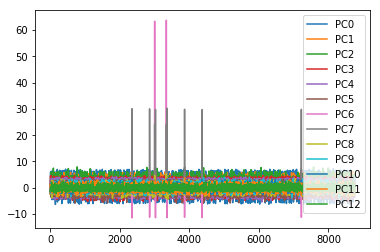

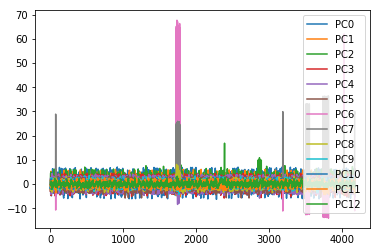

In [102]:
import matplotlib.pyplot as plt
for component in transform_df03.columns:
    plt.plot(transform_df03[component],label=component)
plt.legend()
plt.show()
    
for component in transform_df04.columns:
    plt.plot(transform_df04[component],label=component)
plt.legend()
plt.show()


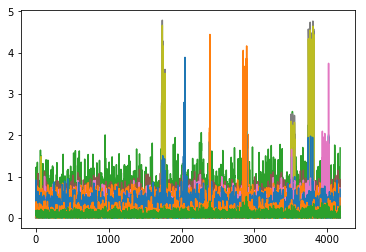

In [103]:
#tranform back to original space of dataset 04 -- this is done to compute the residuals
transform_back = np.dot(transform04,pca13.components_)

#residuals stored into an array - residuals are the difference between X_scaled04 and transform_back

residuals = X_scaled04 - transform_back

import matplotlib.pyplot as plt
plt.plot(abs(residuals))
plt.show()


In [104]:
# Squared Prediction Error
P = np.transpose(pca13.components_[:13])
P_T = np.transpose(P)
I = np.identity(P.shape[0])
y_dash = []
spe = []
C = np.dot(P,P_T)

X_scaled04.shape
for ii in range(X_scaled04.shape[0]):
    y = np.transpose(X_scaled04[ii])
    y_dash_element = np.dot((I - C),y)
    y_dash.append(y_dash_element)
    spe.append(np.square(np.linalg.norm(y_dash_element)))

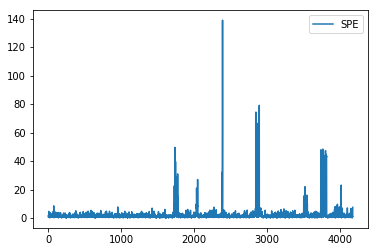

In [105]:
pd.Series(spe).plot(label="SPE")
plt.legend()
plt.show()

In [106]:
threshold = 50 # based on visual
anomalies = [1 if x > threshold else 0 for x in spe]
pd.Series(anomalies).value_counts()

0    4170
1       7
dtype: int64

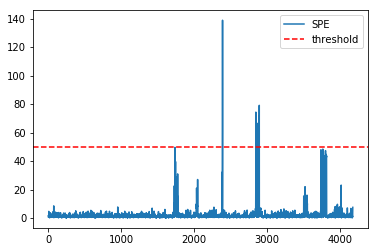

In [107]:
pd.Series(spe).plot(label="SPE")
plt.axhline(y=threshold,linestyle='--',color='red',label='threshold')
plt.legend()
plt.show()

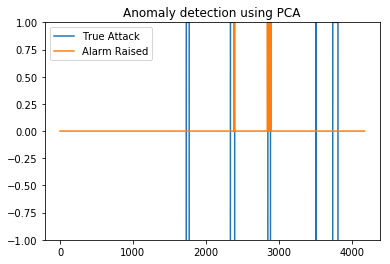

In [108]:
anomalies = pd.Series(anomalies)
true_attacks = pd.read_csv("dataset/BATADAL_dataset04.csv")[' ATT_FLAG']

axes = plt.gca()
axes.set_ylim([-1,1])
plt.plot(true_attacks, label="True Attack")
anomalies.plot(label="Alarm Raised")
plt.title("Anomaly detection using PCA")
plt.legend()